In [12]:
import numpy as np
from scipy.stats import norm,gaussian_kde
import matplotlib.pyplot as plt 

# PDF vs PMF
- Para una variable discreta X, de valores aleatorios, definimos la **PMF (Probability mass function)** como una función tal que $\mathbf{f_{\color{Red} X}(x)=P({\color{Red} X}=x)}$ para todo x. La función acumulada era la **CDF (cumulative distribution function)**, que era la probabilidad de obtener un valor menor o igual a x.

- Ahora podemos definir para una variable continua X, una distribución continua (continuous distribution). Hablamos de una función densidad de probabilidad (PDF) como la función…

<center>$$\mathbf{F_{\color{Red} X}(x)=\int_{-\infty }^{x} \textit{f}_{\color{Red} X}(t) \; \delta t}$$</center>

## Dos tipos de distribuciones continuas: exponencial y normal. 

### Distribución exponencial 

<center>$$\mathbf{{\color{DarkGreen} CDF(x)  =1 - e^{-\lambda\cdot x}} \; \; y\; \; {\color{DarkBlue} PDF(x)  =\lambda \cdot e^{-\lambda\cdot x}}}$$</center>
- Son aquellas en las que se describe el tiempo entre acontecimientos. Cuando es igualmente probable que cualquier suceso ocurra en cualquier momento, la distribución del tiempo entre sucesos tiene a describise con una distribución exponencial.  La media es 1/λ, la varianza $1/\lambda^2$ y la mediana $ln(2)/\lambda$.
- Algunos ejemplos son la caída de radioactividad de una partícula, el tiempo entre llamadas de teléfono, o entre los pagos de una hipoteca.

### Distribución normal o gaussiana 
- Esta distribución describe muchos fenómenos, como el tamaño de tejidos vivos, el tamaño de los apéndices (uñas, dientes, etc.) , medidas de la presión sanguínea, etc.
- Su función CDF no es una expresión cerrada. Sin embargo, la expresión del PDF es bien conocida:

  <center>$$\mathbf{{\color{DarkBlue}  PDF(x)= \frac {1}{{\sqrt {2\pi\sigma^2}}} \cdot e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}}$$
</center>

- El parámetro **σ** nos dará la forma de la campana, centrada en la media **μ**.

### Densidad Kernel
- En muchos problemas reales, puede que no estemos interesados tanto en los parámetros de los datos (media, varianza, etc. ) como en una representación continua, no paramétrica, de los mismos. Es la distribución **kernel**.
- Si tenemos una serie de datos, podemos suponer un kernel gausiano alrededor de los datos. 
 
<br>
En el ejemplo generamos dos conjuntos de datos siguiendo distribuciones normales, una centrada en -1 y otra en 6, con desviaciones de 0.5 y 1. Concatenamos ambos conjuntos y hallamos su kernel.

In [13]:
x1 = np.random.normal(-1,0.5,15)
x2 = np.random.normal(6,1,10) 
# print(x1,x2)

In [14]:
y=np.r_[x1,x2] # los concatenamos
x=np.linspace(min(y),max(y),100) # obtenemos 100 números igualmente espaciados  entre el mínimo de y y el máximo
s = 0.4 # parámetro de suavización


<hr>

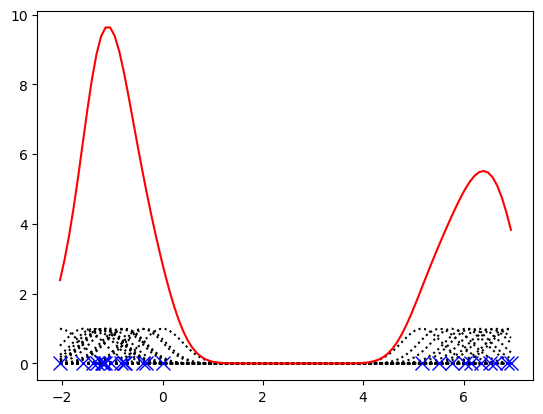

In [15]:
datos = [norm.pdf(x,yi,s) for yi in y]  # hay que importarla de la biblioteca scipy 
kernels = np.transpose(datos) # trasposición. Si es un solo vector, se queda igual. Transponer una matriz. 
# datos es una lista de 25 vectores, uno por cada yi, con la distribución normal centrada en yi (y la suavidad o desviación típica s) con 100 valores de x.
plt.plot(x,kernels,'k:') # dibujo de las 25 distribuciones de datos. 
plt.plot(x,kernels.sum(1), 'r') # suma de las 25 distribuciones de datos. Mirar lo que significa sum(1)
plt.plot(y,np.zeros(len(y)),'bx',ms=10) # señalamos donde estaban los valores y.




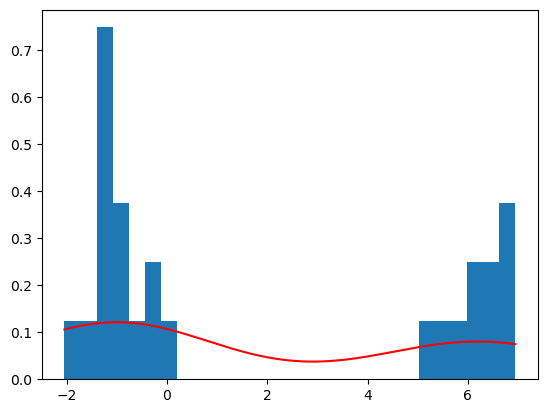

In [16]:
density = gaussian_kde(y) #densidad tipo gaussiano de los valores y. gaussian_kde sustituye a kde.gaussian_kde
xgrid = np.linspace(x.min(),x.max(),200) # tomo 200 puntos entre los valores x. 
plt.hist(y,bins=28,density=True) # dibujo un histograma con un intervalo de 28
plt.plot(xgrid,density(xgrid),'r-') # dibujo la función densidad.